# Machine for Classification

In this notebook we will build two algorythms for classification: Perceptron, and Adaptive Linear Neuron (Adaline).

In [1]:
# libraries

import numpy as np
import pandas as pd

# to check the accuracy of the model
from sklearn.metrics import accuracy_score


# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

# Perceptron

The Perceptron algorythm is a unit step function that predicts the class label. The input of sample $x = (x_1, x_2, ..., 1)$ and the weight of each feature $\theta = (w_1, w_2, ..., w_0)$, where the ouput $Z$ is the cross product of $\theta$ and $x$. In other words, 


$$Z = \theta^Tx = w_1x_1 + w_2x_2 + ... + w_0$$

Then the output is weighted by the function $\Theta(Z)$.

$$\Theta(Z) = 
    \left\{
            \begin{array}{ll}
            1 & \mbox{if } Z \geq 0 \\
            -1 & \mbox{if } Z < 0
            \end{array}
         \right.$$
         
         
#### Perceptron learning rule:

Since the outcome is determined as an unit step, in order for the model to work, both class labels must be linearly separable.

1. Initialize the weights to 0 or small random numbers.

2. For each training sample:         
    a. Compute the predicted class label $\dot{y}$,     
    b. Update weights $\theta$
    $$\theta_j = \theta_j + \nabla\theta_j$$
    
    where $\nabla\theta_j = \eta(y - \dot{y})$


In [2]:
# Perceptron

class Perceptron(object):
    """Perceptron only works for linearly separable binary classificatio
    
        Parameters
        - - - - - -
        eta: float between 0.0 to 1, learning rate of the model
        epoch: int number, number of iterations for each training set
        random_state: random number generator seed
        
        
        Atributes
        - - - - -
        weigths: coefficients of each parameter, random selected small numbers
        errors: number of updates performed for each epoch"""
    
    def __init__(self, eta=0.01, epoch=50, random_state=1):
        self.eta = eta
        self.epoch = epoch
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
            Parameters
            - - - - - -
            X: array-like, shape=[n_samples, n_features]
            y: array-like, shape=[n_samples], Target values
            
            Returns
            - - - - 
            self: object
            """
        ngen = np.random.RandomState(self.random_state)
        self.weights = ngen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        
        self.errors = []
        
        for _ in range(self.epoch):
            error = 0
            
            for xi, target in zip(X, y):
                update = self.eta*(target - self.predict(xi))
                self.weights[0] += update
                self.weights[1:] += update*xi
                error += int(update != 0.0)
                
            self.errors.append(error)
            
        return self
    
    def net_input(self, X):
        """Calculate net weigth"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        """Threshold, return class label unit instead"""
        return np.where(self.net_input(X) >= 0, 1, -1)

To verify if the Perceptron works, it will be tested with data samples. First with synthetic data, and second with the iris data set.

## Perceptron 

### 1. Synthetic Data

In [3]:
# Synthetic data for testing the perceptron 
np.random.seed(42)

class1_mean = np.array([1, 1])
class1_var = 0.5

class2_mean = np.array([-2, -1])
class2_var = 0.4

class1 = np.random.randn(100, 2)*class1_var + class1_mean
class2 = np.random.randn(100, 2)*class2_var + class2_mean

Text(0, 0.5, 'x2')

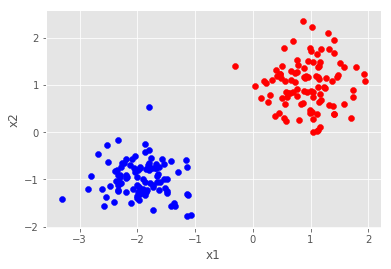

In [4]:
# Visualization of data

fig, ax = plt.subplots()

ax.scatter(class1[:, 0], class1[:, 1], c='r')
ax.scatter(class2[:, 0], class2[:, 1], c='b')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [5]:
# Data shuffle
inds = np.random.permutation(200)
X = np.vstack([class1, class2])[inds, :]
y = np.squeeze(np.vstack([-np.ones((100, 1)), np.ones((100, 1))])[inds])

In [6]:
# Perceptron model with synthetic data

model_snt = Perceptron(eta=0.001, epoch=20)

model_snt.fit(X, y)

y_prd_snt = model_snt.predict(X)

accuracy_score(y, y_prd_snt)

1.0

(0, 6)

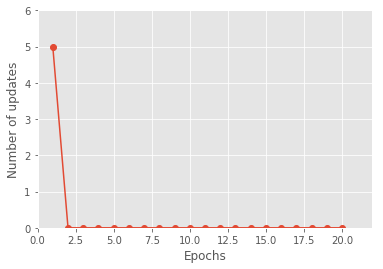

In [7]:
# model visualization of errors
plt.plot(range(1, len(model_snt.errors)+1), model_snt.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.xlim(0, 22)
plt.ylim(0, 6)

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

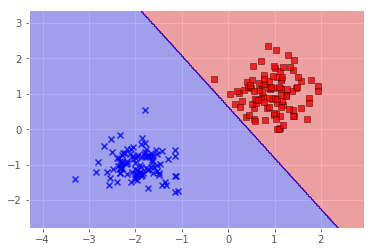

In [9]:
plot_decision_regions(X, y, model_snt)

## Perceptron 

### 2. Iris Data Set

In [10]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df[4].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


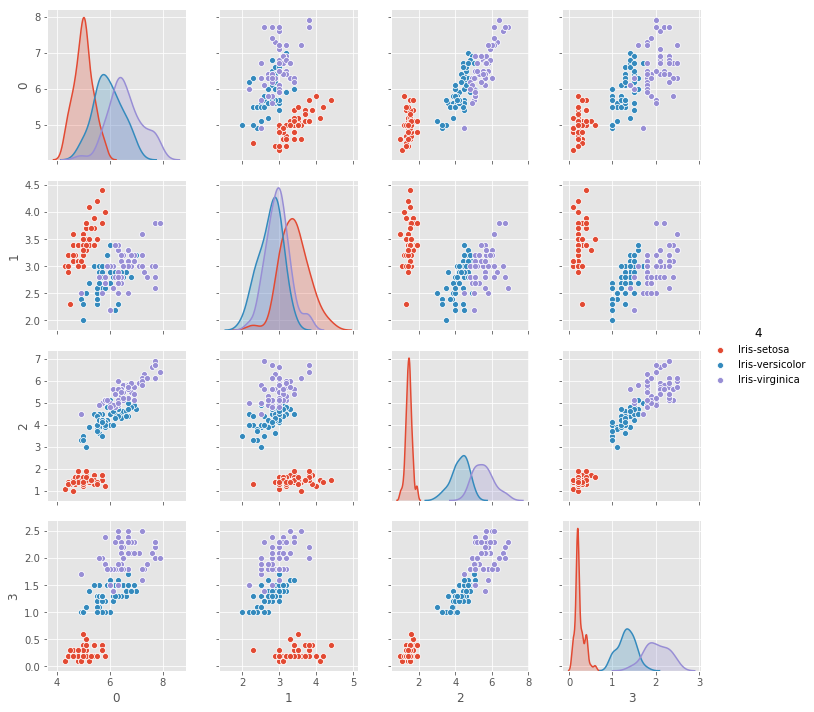

In [13]:
sns.pairplot(df, hue=4)

In [14]:
# Variables selection for 2 features
ys = df.iloc[0:100, 4].values
ys = np.where(ys =='Iris-setosa', 1, -1)
xs = df.iloc[0:100, [0,2]].values

In [15]:
# Iris model
iris_pctn = Perceptron(eta=0.1, epoch=10)
iris_pctn.fit(xs, ys)

yhat = iris_pctn.predict(xs)

accuracy_score(ys, yhat)

1.0

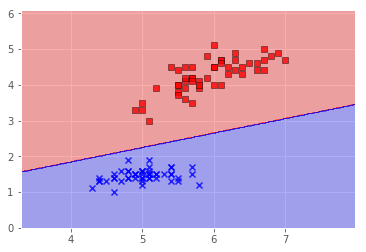

In [16]:
# Iris model visualization
plot_decision_regions(xs, ys, classifier=iris_pctn)

In [17]:
# variables selection for 4 features
xs4 = df.iloc[0:100, :4].values
xs4[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
# Iris model for 4 features
iris2_pctn = Perceptron(eta=0.1, epoch=10)
iris2_pctn.fit(xs4, ys)

yhat4 = iris2_pctn.predict(xs4)

accuracy_score(ys, yhat4)

1.0

# Adaline

ADAptive LInear NEuron, the weights updates through a linear activation instead of a unit step like the perceptron. Therefore, $Z$ is just the net weight of linear activation function, resulting in $\Theta(Z) = \theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_mx_m$. Another advatange Adaline has over the perceptron is that upgrade of the weights occurs through minimizing **the cost function**, which is differentiable and a technique such as **gradient descent** can reach a global or local minimum.

   $$\theta = \theta + \nabla\theta$$
   
   $$\nabla\theta = -\eta\nabla J(\theta)$$
   
   $$\nabla J(\theta) = \frac{1}{2}\frac{\partial J}{\partial\theta}\sum\limits_{i}(y^{(i)} - \Theta(Z^{(i)}))^2 = ---\sum\limits_{i}(y^{(i)} - \Theta(Z^{(i)}))x^{(i)}_j$$ 
   
   $$\nabla\theta = \eta\sum\limits_{i}(y^{(i)} - \Theta(Z^{(i)}))x^{(i)}_j$$
   
The following code is the adaline with gradient descent.

In [38]:
class AdalineGD(object):
    """ADAptive LInear NEuron
    
        Parameters
        - - - - - -
        eta: float between 0.0 to 1, learning rate of the model
        epoch: int number, number of iterations for each training set
        random_state: random number generator seed
        
        
        Atributes
        - - - - -
        weigths: coefficients of each parameter, random selected small numbers
        cost: cost function, sum of square errors divided by 2"""
    
    def __init__(self, eta=0.01, epoch=50, random_state=1):
        
        self.eta = eta
        self.epoch = epoch
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
            Parameters
            - - - - - -
            X: array-like, shape=[n_samples, n_features]
            y: array-like, shape=[n_samples], Target values
            
            Returns
            - - - - 
            self: object"""
        
        ngen = np.random.RandomState(self.random_state)
        self.weights = ngen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        
        self.cost = []
        
        for _ in range(self.epoch):
           
            output = self.net_input(X)
            errors = (y - output)
            self.weights[0] += self.eta*errors.sum()
            self.weights[1:] += self.eta*X.T.dot(errors)
            cost = (errors**2).sum()/2
            self.cost.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        """return the class label unit step"""
        return np.where(self.net_input(X)>=0.0, 1, -1)
        

## Adaline-Gradient Descent

### 1. Synthetic Data

In [39]:
adln_snd = AdalineGD(eta=0.0001, epoch=100)
adln_snd.fit(X, y)
y_adl_pred = adln_snd.predict(X)
accuracy_score(y, y_adl_pred)

1.0

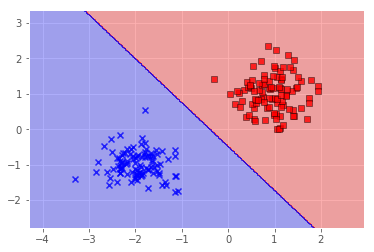

In [41]:
plot_decision_regions(X, y, adln_snd)

## Adaline-Gradient Descent

### 2. Iris Data

In [42]:
adln = AdalineGD(eta=0.001, epoch=500)
adln.fit(xs, ys)
y_pred_rs = adln.predict(xs)
accuracy_score(ys, y_pred_rs)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square


0.5

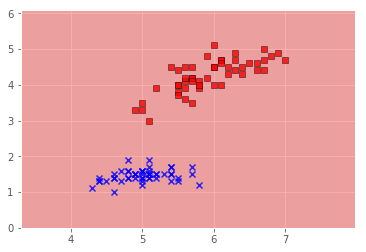

In [43]:
plot_decision_regions(xs, ys, adln)

## Adaline-Gradient Descent

### 2.1.         Iris Data, Improving gradient descend through feature scalling

Data **standardization** normalizes the data by substracting the mean and dividing by the standard deviation.

$$\dot{x_i} = \frac{x_i - \mu}{\sigma}$$

In [44]:
xd = np.copy(xs)
yd = np.copy(ys)
xd[:, 0] = (xd[:, 0]-xd[:, 0].mean())/xd[:, 0].std()
xd[:, 1] = (xd[:, 1]-xd[:, 1].mean())/xd[:, 1].std()

In [45]:
adln_std = AdalineGD(eta=0.001, epoch=500)
adln_std.fit(xd, yd)
y_pred_rd = adln_std.predict(xd)
accuracy_score(yd, y_pred_rd)

1.0

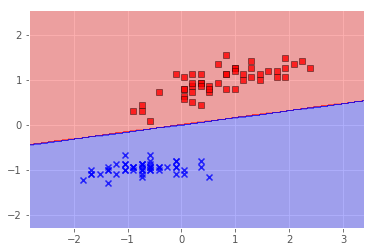

In [46]:
plot_decision_regions(xd, yd, adln_std)

## Adaline-Stochastic Gradient Descent



In [60]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, epoch=50, shuffle=True, random_state=1):
        self.eta = eta
        self.epoch = epoch
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        
        self.ngen = np.random.RandomState(self.random_state)
        self.weights = self.ngen.normal(loc=0, scale=0.01, size=1+X.shape[1])
        
        self.mse = []
        self.cost = []
        
        for _ in range(self.epoch):
            
            if self.shuffle:
                X, y = self.shuffles(X, y)
            cost = []
            
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.weights[0] += self.eta*error
                self.weights[1:] += self.eta*xi.T.dot(error)
                cost.append((error**2).sum()/2)
                mse = (error**2).sum()/len(y)
                
            mse = 2*sum(cost)/len(y)
            avg_cost = sum(cost)/len(y)
            self.cost.append(avg_cost)
            self.mse.append(mse)
            
        return self
    
    def shuffles(self, X, y):
        shl = self.ngen.permutation(len(y))
        return X[shl], y[shl]
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Adaline-Stochastic Gradient Descent

### 1. Synthetic Data

In [64]:
adlns = AdalineSGD(eta=0.01, epoch=50)
adlns.fit(X, y)
y_pred_rss = adlns.predict(X)
accuracy_score(y, y_pred_rss)

1.0

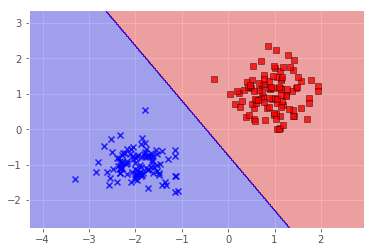

In [65]:
plot_decision_regions(X, y, adlns)

## Adaline-Stochastic Gradient Descent

### 2. Iris Data

In [67]:
adlns_iris = AdalineSGD(eta=0.01, epoch=50)
adlns_iris.fit(xs, ys)
y_pred_iris = adlns_iris.predict(xs)
accuracy_score(ys, y_pred_iris)

1.0

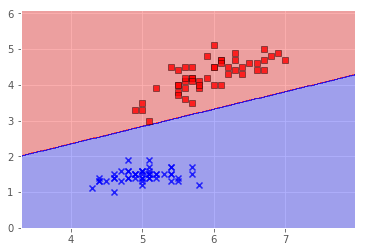

In [68]:
plot_decision_regions(xs, ys, adlns_iris)

## Adaline-Stochastic Gradient Descent

### 2.1.         Iris Data, Improving gradient descend through feature scalling

In [70]:
adlns_iris_std = AdalineSGD(eta=0.01, epoch=50)
adlns_iris_std.fit(xd, yd)
y_pred_iris_std = adlns_iris_std.predict(xd)
accuracy_score(yd, y_pred_iris_std)

1.0

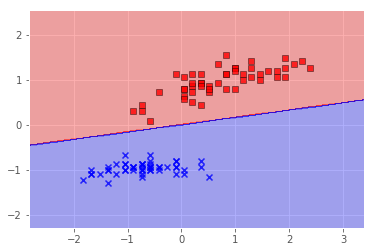

In [71]:
plot_decision_regions(xd, yd, adlns_iris_std)